<a href="https://colab.research.google.com/github/ihwani-math/stocks_prediction/blob/main/LSTM_LQ45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas Sains Komputasi
Memprediksi salah satu saham indeks LQ45 (^JKLQ45) menggunakan metode LSTM

In [22]:
#Author: Ivan L. Ihwani
#Last Update: 9/30/2024

#Import library yang digunakan
import math
import pandas_datareader as web
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [27]:
#akses data
df = yf.download('^JKLQ45', start='2016-05-01', end='2024-05-21')
#tampilkan data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-05-02,830.140015,831.590027,818.880005,826.619995,826.619995,953600000
2016-05-03,829.250000,831.900024,825.830017,827.190002,827.190002,1046900000
2016-05-04,826.299988,830.979980,818.080017,830.979980,830.979980,1256400000
2016-05-09,827.510010,828.849976,815.200012,815.200012,815.200012,1467700000
2016-05-10,815.260010,819.559998,811.580017,819.450012,819.450012,1384400000
...,...,...,...,...,...,...
2024-05-14,895.200012,898.780029,891.010010,892.580017,892.580017,3244800000
2024-05-15,893.020020,904.780029,890.919983,901.400024,901.400024,3419400000
2024-05-16,906.669983,912.590027,904.900024,909.309998,909.309998,4888800000


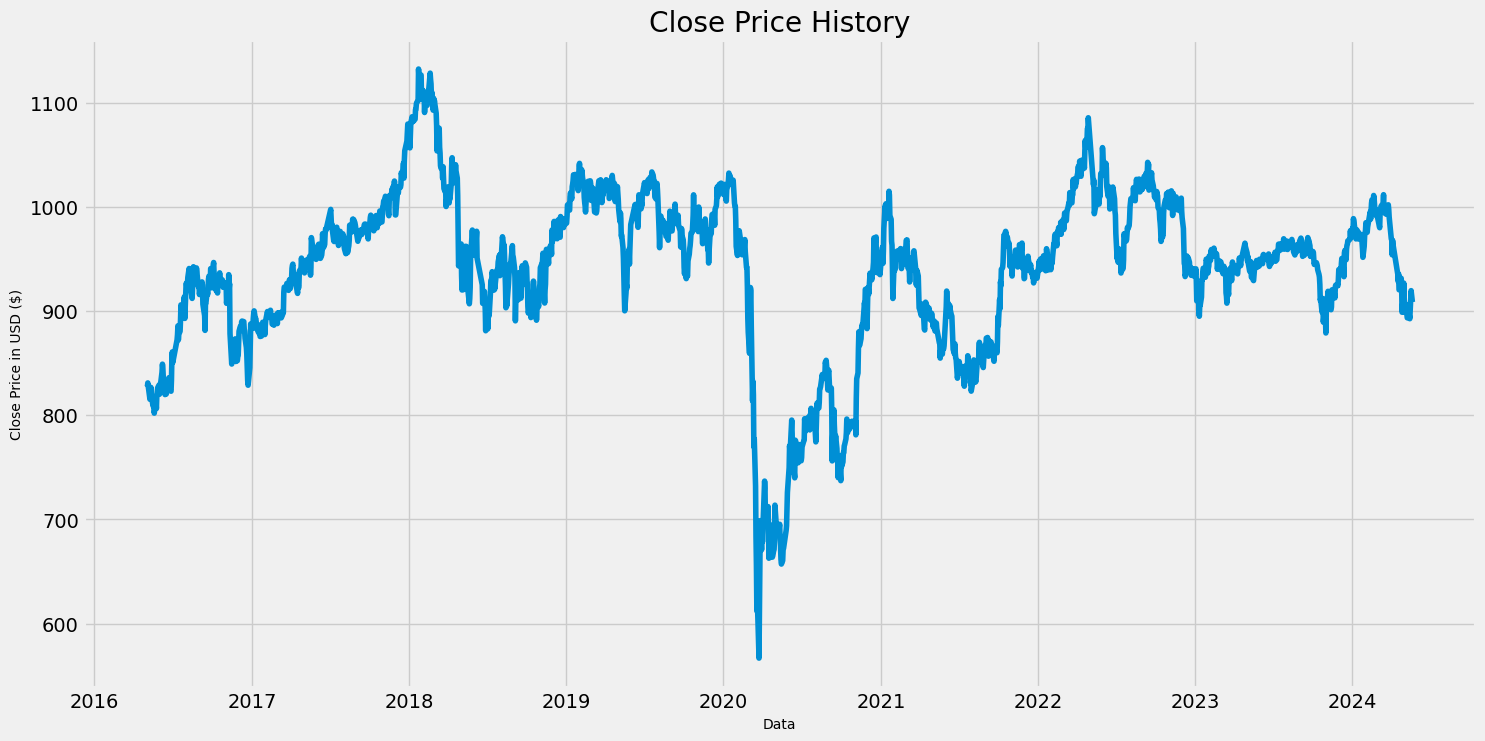

In [29]:
#visualisasi grafik histori harga penutupan
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=10)
plt.ylabel('Close Price in USD ($)', fontsize=10)
plt.show()

In [30]:
#Membuat dataframe yang hanya berisi data 'Close'
data=df.filter(['Close'])
dataset=data.values
#jumlah baris yang menjadi model train
training_data_len=math.ceil(len(dataset)* .8)

training_data_len

1558

In [31]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.45951255],
       [0.46052077],
       [0.46722442],
       ...,
       [0.60577336],
       [0.62381498],
       [0.60441136]])

In [32]:
#membuat dataset training
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

In [33]:
for i in range (60, len(train_data)):
  x_train.append(train_data[i-60 : i, 0])
  y_train.append(train_data[i, 0])
  if i<=61 :
    print(x_train)
    print(y_train)
    print()

[array([0.45951255, 0.46052077, 0.46722442, 0.43931305, 0.44683039,
       0.45968938, 0.45772606, 0.44254996, 0.42857652, 0.42742676,
       0.42979698, 0.41584125, 0.42153679, 0.43358221, 0.42365924,
       0.4464059 , 0.44932433, 0.45894652, 0.46338619, 0.4478209 ,
       0.46448283, 0.46117521, 0.46715371, 0.48535446, 0.49900954,
       0.49165133, 0.47421114, 0.46105138, 0.44737871, 0.45318027,
       0.44808616, 0.44854606, 0.45590426, 0.46536722, 0.47042592,
       0.47597993, 0.46725983, 0.45597498, 0.45309185, 0.47230082,
       0.51091343, 0.51982806, 0.50178654, 0.5402222 , 0.54892459,
       0.56403008, 0.54016909, 0.54949062, 0.5549385 , 0.57347533,
       0.59965333, 0.58728954, 0.57980761, 0.58957134, 0.59319733,
       0.60837353, 0.61355606, 0.57664153, 0.63547122, 0.63690393])]
[0.6259728504931037]

[array([0.45951255, 0.46052077, 0.46722442, 0.43931305, 0.44683039,
       0.45968938, 0.45772606, 0.44254996, 0.42857652, 0.42742676,
       0.42979698, 0.41584125, 0.421

In [34]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1498, 60, 1)

In [35]:
#LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')
#train model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1498/1498 ━━━━━━━━━━━━━━━━━━━━ 47s 29ms/step - loss: 0.0104


In [37]:
#membuat dataset test
test_data=scaled_data[training_data_len - 60: 2037]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60: i, 0])

In [38]:
x_test = np.array(x_test)

In [39]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [40]:
#model prediksi
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


In [41]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

6.383554649843348

In [42]:
train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-42-fac123c220ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


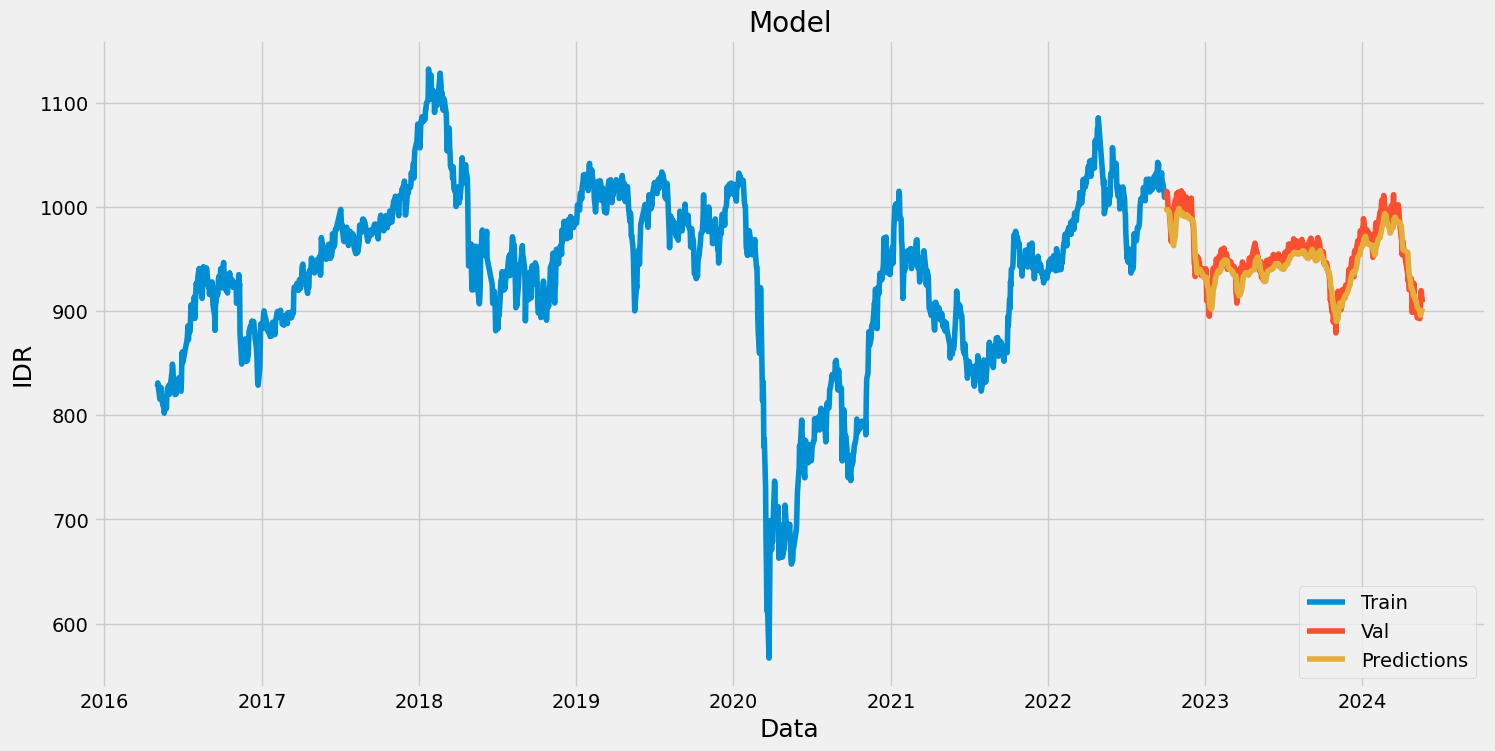

In [43]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize=18)
plt.ylabel('IDR',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [44]:
valid

,Close,Predictions
Date,,
2022-10-03,1006.369995,999.439880
2022-10-04,1014.650024,997.010437
2022-10-05,1011.630005,996.703857
2022-10-06,1010.679993,996.708191
2022-10-07,999.390015,996.769104
...,...,...
2024-05-14,892.580017,898.156189
2024-05-15,901.400024,895.980469
2024-05-16,909.309998,895.897217
